In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report


2025-08-13 15:59:43.260745: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 15:59:43.298178: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-13 15:59:43.298304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-13 15:59:43.299552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-13 15:59:43.306183: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 15:59:43.306710: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
import random
random.seed(42)

# Define paths
MODELS_DIR = 'models'
IMAGES_DIR = 'images' # Directory for user-provided test images

# Create necessary directories
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(IMAGES_DIR, exist_ok=True) # Ensure images directory exists

print("--- CIFAR-10 Project Setup (tf.keras.datasets) ---")


--- CIFAR-10 Project Setup (tf.keras.datasets) ---



--- 1. Data Loading and Preprocessing ---
Loading CIFAR-10 Dataset from tf.keras.datasets...
170498071/170498071 [==============================] - 3s 0us/step
CIFAR-10 Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)
CIFAR-10 data normalized.


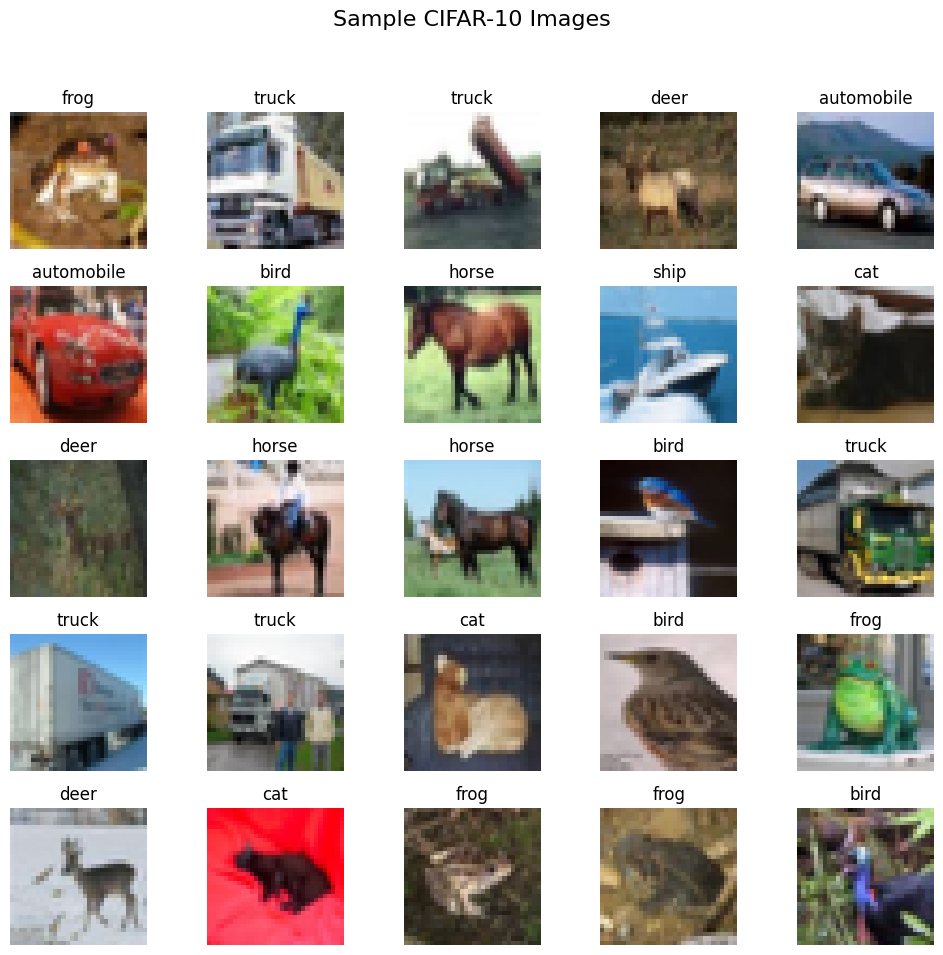

In [3]:
print("\n--- 1. Data Loading and Preprocessing ---")

print("Loading CIFAR-10 Dataset from tf.keras.datasets...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f"CIFAR-10 Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Normalize CIFAR-10 data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("CIFAR-10 data normalized.")

# Define CIFAR-10 class names for better readability in plots
cifar10_class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Display sample CIFAR-10 images
plt.figure(figsize=(10,10))
plt.suptitle("Sample CIFAR-10 Images", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title(f"{cifar10_class_names[y_train[i][0]]}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [4]:
print("\n--- 2. Data Augmentation Configuration ---")

# Configure ImageDataGenerator for CIFAR-10
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)
print("ImageDataGenerator configured for CIFAR-10.")



--- 2. Data Augmentation Configuration ---
ImageDataGenerator configured for CIFAR-10.


In [5]:
print("\n--- 3. Building the CNN Model ---")

# Define CIFAR-10 CNN Model with Batch Normalization and Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nCIFAR-10 Model Summary:")
model.summary()



--- 3. Building the CNN Model ---

CIFAR-10 Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                             


--- 4. Training the Model ---
Training CIFAR-10 Model...
Epoch 1/20
1563/1563 [==============================] - 72s 45ms/step - loss: 1.6522 - accuracy: 0.1024 - val_loss: 1.2750 - val_accuracy: 0.0958
Epoch 2/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3475 - accuracy: 0.1014 - val_loss: 1.2165 - val_accuracy: 0.1408
Epoch 3/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2266 - accuracy: 0.1024 - val_loss: 1.0250 - val_accuracy: 0.1426
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1420 - accuracy: 0.0981 - val_loss: 1.0234 - val_accuracy: 0.0863
Epoch 5/20
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0863 - accuracy: 0.0979 - val_loss: 0.9598 - val_accuracy: 0.0984
Epoch 6/20
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0335 - accuracy: 0.0999 - val_loss: 1.0242 - val_accuracy: 0.1188
Epoch 7/20
1563/1563 [==============================] - 71s 45ms/s

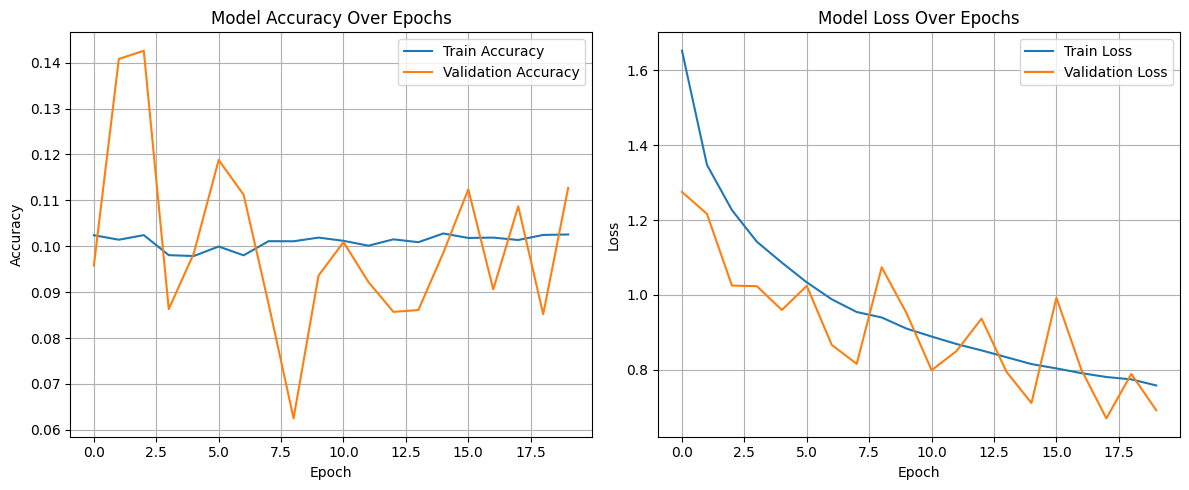

In [6]:
print("\n--- 4. Training the Model ---")

# Train the Model with augmented data
print("Training CIFAR-10 Model...")
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=20, # Increased epochs for better training
                    validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



--- 5. Model Evaluation ---
313/313 [==============================] - 3s 9ms/step - loss: 0.6919 - accuracy: 0.1127
CIFAR-10 Test Loss: 0.6919
CIFAR-10 Test Accuracy: 0.1127
313/313 [==============================] - 3s 9ms/step

CIFAR-10 Classification Report:
              precision    recall  f1-score   support

    airplane       0.75      0.84      0.79      1000
  automobile       0.84      0.92      0.88      1000
        bird       0.73      0.65      0.69      1000
         cat       0.59      0.59      0.59      1000
        deer       0.84      0.58      0.69      1000
         dog       0.64      0.75      0.69      1000
        frog       0.84      0.82      0.83      1000
       horse       0.74      0.88      0.80      1000
        ship       0.93      0.75      0.83      1000
       truck       0.84      0.87      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.7

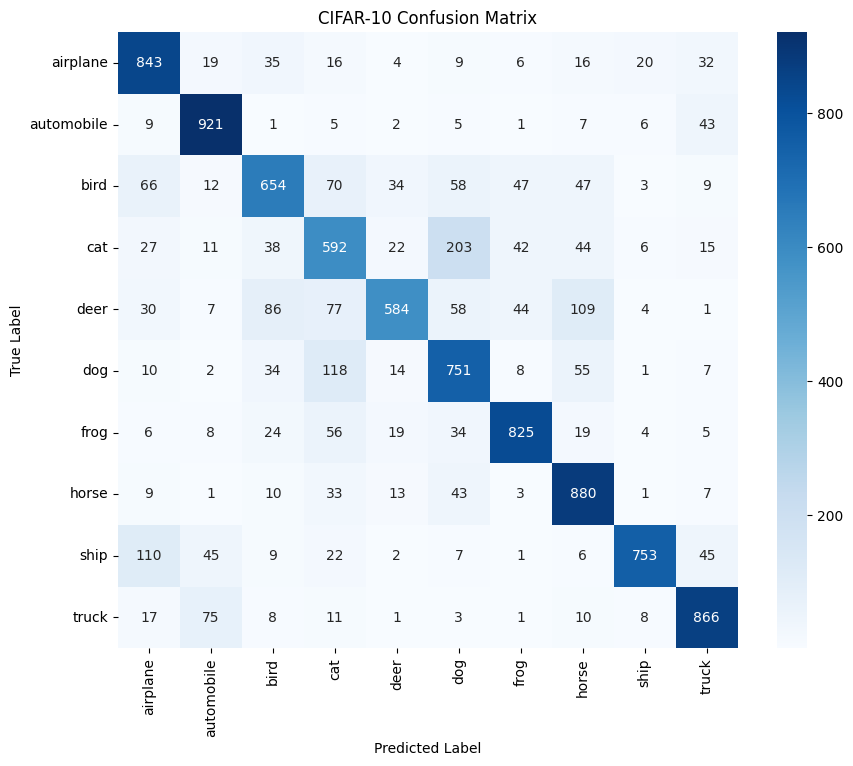

313/313 [==============================] - 3s 9ms/step


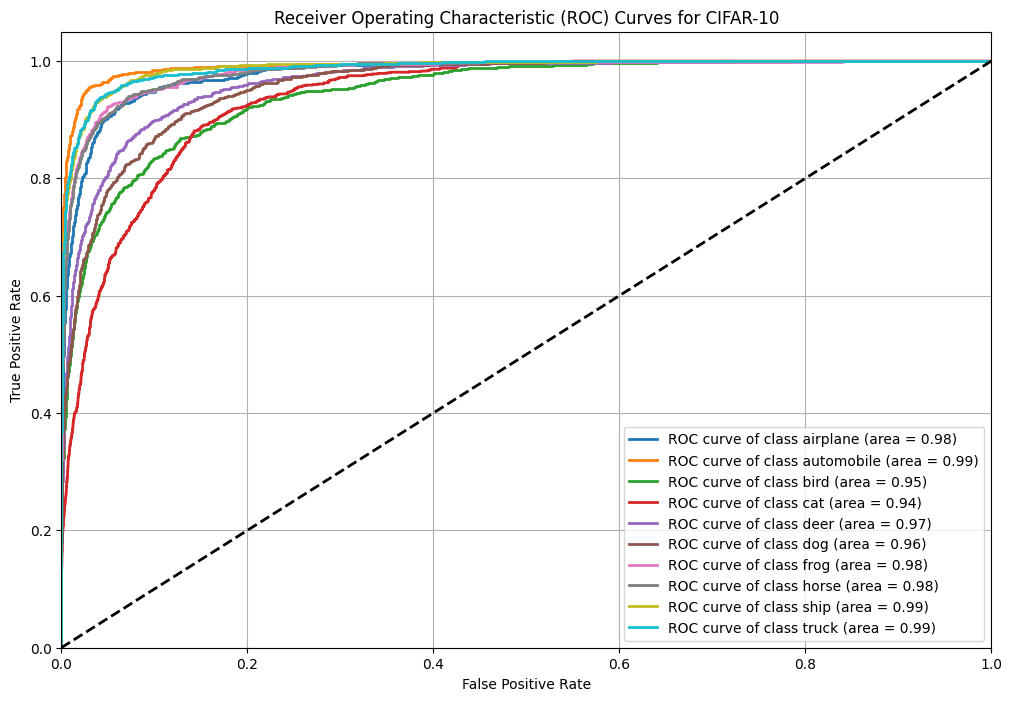

In [12]:
print("\n--- 5. Model Evaluation ---")

# Evaluate the Model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CIFAR-10 Test Loss: {test_loss:.4f}")
print(f"CIFAR-10 Test Accuracy: {test_acc:.4f}")

# Get predictions for classification report and confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)

print("\nCIFAR-10 Classification Report:")
print(classification_report(y_test, y_pred, target_names=cifar10_class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cifar10_class_names, yticklabels=cifar10_class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CIFAR-10 Confusion Matrix')
plt.show()

# Plot ROC Curves for each class
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC curve
n_classes = len(cifar10_class_names)
y_test_binarized = label_binarize(y_test, classes=range(n_classes))
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'ROC curve of class {cifar10_class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for CIFAR-10')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [8]:
print("\n--- 6. Save and Load Model ---")

model_save_path = os.path.join(MODELS_DIR, 'cifar10_cnn_model.h5')
model.save(model_save_path)
print(f"CIFAR-10 model saved to {model_save_path}")

# Load the saved model (demonstration)
loaded_model = load_model(model_save_path)
print(f"Model loaded from {model_save_path}")



--- 6. Save and Load Model ---
/root/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
CIFAR-10 model saved to models/cifar10_cnn_model.h5
Model loaded from models/cifar10_cnn_model.h5



--- 7. Make Prediction on a Random Image from the Web ---
1/1 [==============================] - 0s 19ms/step
Predicted class: dog with confidence 0.87


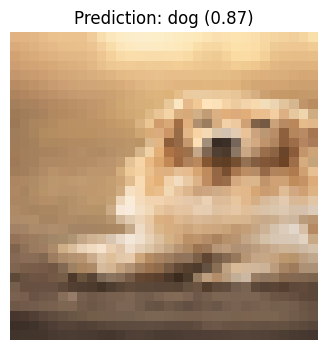

In [42]:
print("\n--- 7. Make Prediction on a Random Image from the Web ---")

# URL of a random CIFAR-10-like image (you can change this to any image URL)
image_url = "https://4kwallpapers.com/images/wallpapers/golden-retriever-scottish-breed-dog-pet-dog-5k-1170x2532-9108.jpg"

# Download the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img = img.convert('RGB')  # Convert image to RGB
img = img.resize((32, 32))  # Resize to match model input size

# Convert image to array and preprocess
img_array = img_to_array(img)  # Use img_to_array directly
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Make prediction
prediction_probs = loaded_model.predict(img_array)
predicted_class_idx = np.argmax(prediction_probs)
predicted_class_name = cifar10_class_names[predicted_class_idx]
confidence = prediction_probs[0][predicted_class_idx]

print(f"Predicted class: {predicted_class_name} with confidence {confidence:.2f}")

# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f})")
plt.axis('off')
plt.show()


--- 7. Make Predictions on Multiple Images from the Web ---
1/1 [==============================] - 0s 20ms/step
Predicted class: dog with confidence 0.87


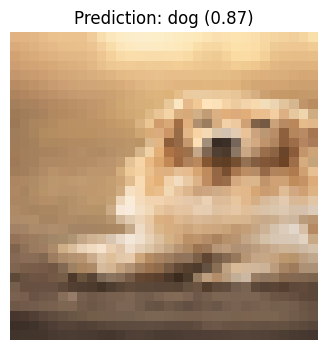

1/1 [==============================] - 0s 15ms/step
Predicted class: airplane with confidence 0.99


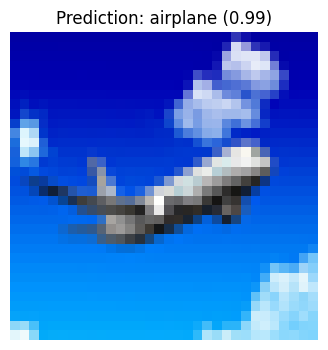

1/1 [==============================] - 0s 20ms/step
Predicted class: truck with confidence 0.77


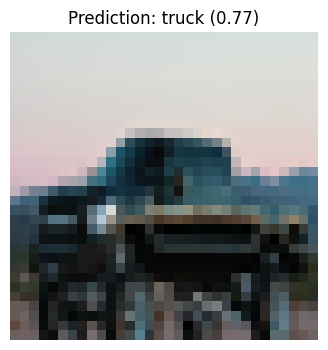

1/1 [==============================] - 0s 19ms/step
Predicted class: deer with confidence 0.85


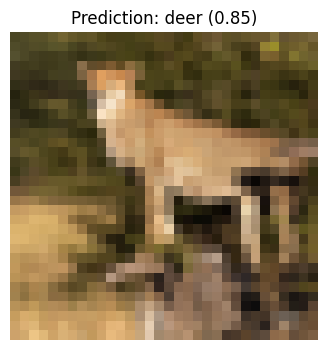

In [57]:
print("\n--- 7. Make Predictions on Multiple Images from the Web ---")

# List of URLs of random CIFAR-10-like images (you can change these to any image URLs)
image_urls = [
    "https://4kwallpapers.com/images/wallpapers/golden-retriever-scottish-breed-dog-pet-dog-5k-1170x2532-9108.jpg",
    "https://th.bing.com/th/id/R.7d381f5a54801c4fa9a8bd214a723f58?rik=DRTA0Jphsj3fjA&riu=http%3a%2f%2fwww.baltana.com%2ffiles%2fwallpapers-13%2fAirplane-HD-Wallpaper-34420.jpg&ehk=5GTV5eg2XhhbR5ivtljKj0D9wcViLnVPbgLhtTclXhc%3d&risl=&pid=ImgRaw&r=0",
    "https://th.bing.com/th/id/R.113fe7347b7e58f4f736c418674abb40?rik=8j8qvV3uq23lmA&riu=http%3a%2f%2fwallpapercave.com%2fwp%2fwp1910862.jpg&ehk=YlMiX8Yj2gtmeDmqoLmdkf7QBGK6SagsbpbLOrsB01M%3d&risl=&pid=ImgRaw&r=0",
    "https://i0.wp.com/epic7travel.com/wp-content/uploads/2019/09/African-Safari-Animals-Cheetah-on-branch.jpg?resize=768%2C960&ssl=1"
]

for image_url in image_urls:
    # Download the image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    #img = img.convert('RGB')  # Convert image to RGB
    img = img.resize((32, 32))  # Resize to match model input size

    # Convert image to array and preprocess
    img_array = img_to_array(img)  # Use img_to_array directly
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Make prediction
    prediction_probs = loaded_model.predict(img_array)
    predicted_class_idx = np.argmax(prediction_probs)
    predicted_class_name = cifar10_class_names[predicted_class_idx]
    confidence = prediction_probs[0][predicted_class_idx]

    print(f"Predicted class: {predicted_class_name} with confidence {confidence:.2f}")

    # Display the image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0506547-c405-4ab3-8f25-a6909658328e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>